<h1>Introduction to Systematic Reviews in International Development, Mannheim, Germany | December 11th-12th, 2019<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise*" data-toc-modified-id="Exercise*-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise*</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [2]:
## source("run_me_first.R")

## Exercise

The first step when investigating publication bias is a visual inspection of the effect-size distribution by means of a funnel plot. In `metafor`, the function to draw a funnel plot is called `funnel(x)`, where `x` represents an `rma` object.

Tip: Which model of summarizing a effect-size distribution do you choose to run the rma function?

Loading required package: Matrix
Loading 'metafor' package (version 2.0-0). For an overview 
and introduction to the package please type: help(metafor).


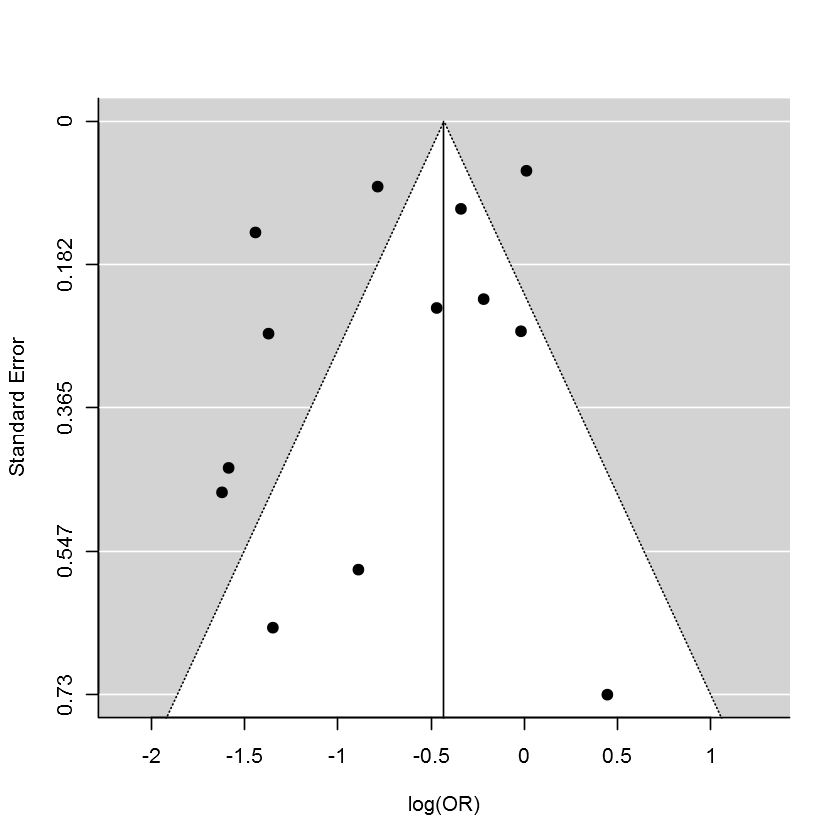

In [3]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res.fem <- rma(yi = yi, vi = vi, method = "FE", data = dat.bcg)
funnel(res.fem, xlab = "log(RR)")

## Exercise

The next step is to run a so-called Egger’s regression test, which was covered in the section on “Correlational
and regression approaches”.

Despite the fact that the `metafor` package provides a ready-to-use function called `regtest()`, we will start by using a simple regression model. In R, the linear model can be estimated using the `lm(y ~ x, data = ...)` function (see also the Monday exercises). 

Tip: You might want to recall that you have to convert the effect sizes to the so-called “standard normal
deviate (SND)”. The precision is defined as 1/SE i 

In [4]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
summary(lm(I(yi/sqrt(vi)) ~ I(1/sqrt(vi)), data = dat.bcg))


Call:
lm(formula = I(yi/sqrt(vi)) ~ I(1/sqrt(vi)), data = dat.bcg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7290 -1.0492  0.7798  1.9944  5.3354 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)    -2.1120     1.5072  -1.401    0.189
I(1/sqrt(vi))  -0.1909     0.2201  -0.868    0.404

Residual standard error: 3.427 on 11 degrees of freedom
Multiple R-squared:  0.06404,	Adjusted R-squared:  -0.02105 
F-statistic: 0.7526 on 1 and 11 DF,  p-value: 0.4042


## Exercise

Now you can apply the `metafor` function `regtest()` to replicate the results from the previous exercise. This time, you are on your own in finding out how the function `regtest()` works. Use the help files `?regtest.rma`.

In [5]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res.fem <- rma(yi = yi, vi = vi, method = "FE", data = dat.bcg)
regtest(res.fem, model = "lm")


Regression Test for Funnel Plot Asymmetry

model:     weighted regression with multiplicative dispersion
predictor: standard error

test for funnel plot asymmetry: t = -1.4013, df = 11, p = 0.1887


## Exercise*

Now we want you to show how to actually plot the regression line and the corresponding 95% confidence intervals. Just relax and enjoy the show ...

In [6]:
## Calculate the SND and the precision
snd <- with(dat.bcg, yi/sqrt(vi))
prec <- with(dat.bcg, 1/sqrt(vi))
## Then create a new data frame called dER
dER <- data.frame(snd, prec)
## Next, we need to run the Egger's regression test
egg.reg <- lm(snd ~ prec, data = dER)
summary(egg.reg)


Call:
lm(formula = snd ~ prec, data = dER)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7290 -1.0492  0.7798  1.9944  5.3354 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -2.1120     1.5072  -1.401    0.189
prec         -0.1909     0.2201  -0.868    0.404

Residual standard error: 3.427 on 11 degrees of freedom
Multiple R-squared:  0.06404,	Adjusted R-squared:  -0.02105 
F-statistic: 0.7526 on 1 and 11 DF,  p-value: 0.4042


In [7]:
## To add confidence lines to the plot, we are using the
## predict function.
x.new <- seq(0, 20, 0.1)
egg.reg.pred <- predict(egg.reg,
newdata = data.frame(prec = x.new),
interval="confidence")

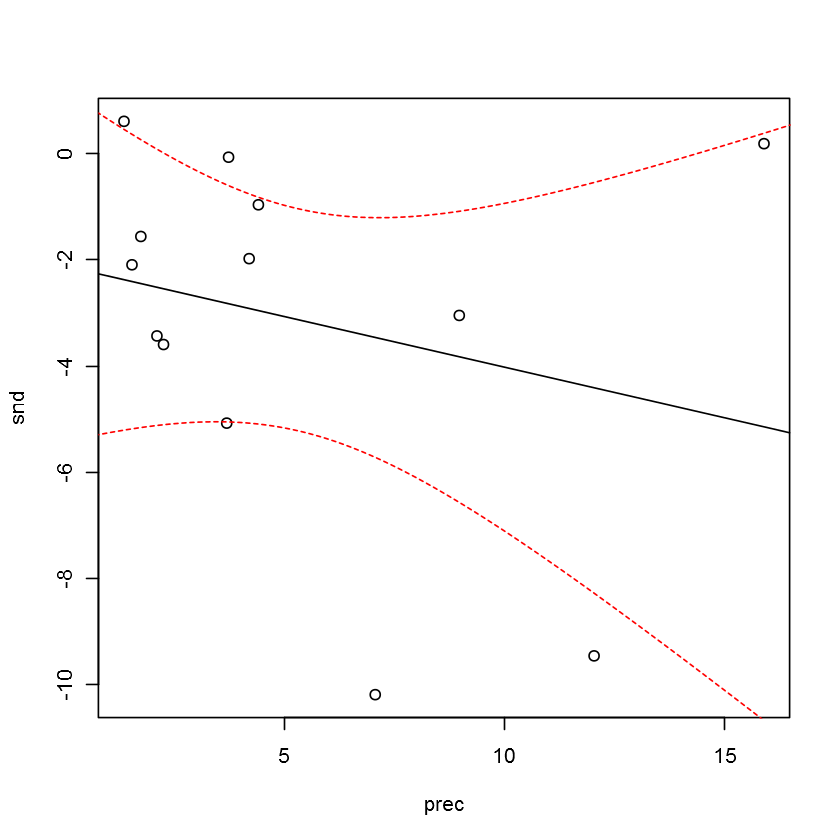

In [8]:
## Then, create the plot
plot(prec, snd)
abline(egg.reg)
lines(x.new, egg.reg.pred[ ,3], lty = 'dashed', col = 'red')
lines(x.new, egg.reg.pred[ ,2], lty = 'dashed', col = 'red')

## Exercise

In this exercise, we will learn how to apply the “trim and fill” approach. The `metafor` package provides the function `trimfill(x, ...)`, where `x` is an `rma` object. It is recommended that you read the help files for the `trimfill()` function (you actually have to use `?trimfill.rma.uni` to read the help pages; look for the "Details" section). 

You might want to start by estimating a univariate random effects model. Compare the results of that univariate random effects model and the trim and fill model.

In [9]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res.rem <- rma(yi = yi, vi = vi, method = "REML", data = dat.bcg)

In [10]:
## Solution.
res.fem <- rma(yi = yi, vi = vi, method = "FE", data = dat.bcg)
res.rem
(res.fem.trimfill1 <- trimfill(res.fem))


Random-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.3132 (SE = 0.1664)
tau (square root of estimated tau^2 value):      0.5597
I^2 (total heterogeneity / total variability):   92.22%
H^2 (total variability / sampling variability):  12.86

Test for Heterogeneity: 
Q(df = 12) = 152.2330, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub     
 -0.7145  0.1798  -3.9744  <.0001  -1.0669  -0.3622  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 



Estimated number of missing studies on the right side: 4 (SE = 2.3853)

Fixed-Effects Model (k = 17)

Test for Heterogeneity: 
Q(df = 16) = 262.7316, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub     
 -0.2910  0.0383  -7.6057  <.0001  -0.3660  -0.2160  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


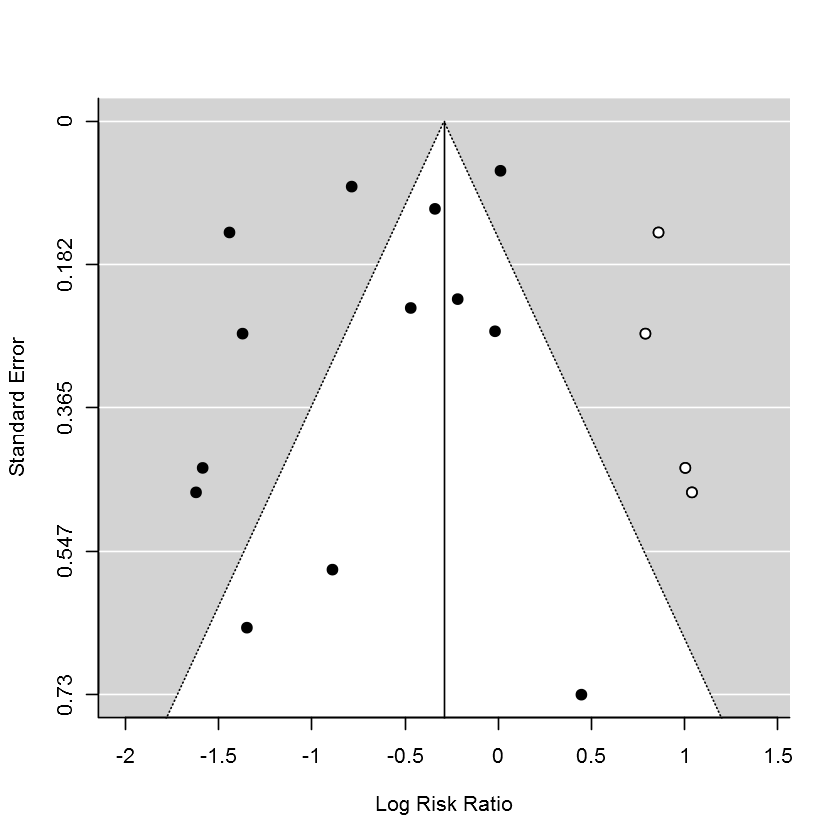

In [11]:
## Solution.
funnel(res.fem.trimfill1)